In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
% matplotlib inline

/Users/ericcriteser/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
color = 'lightblue'

In [3]:
data = pd.read_csv('sorted_sales_qtr_fix.csv')
#data.head()

In [4]:
df = data.query('Store == 1').copy()
ts = df[['Date', 'Weekly_Sales']].copy()
ts['Date'] = pd.to_datetime(ts.Date)
ts.set_index('Date', inplace=True)
#ts.head()

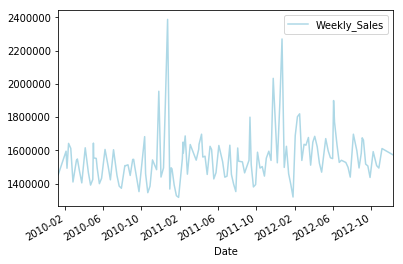

In [5]:
ts.plot(color = color);

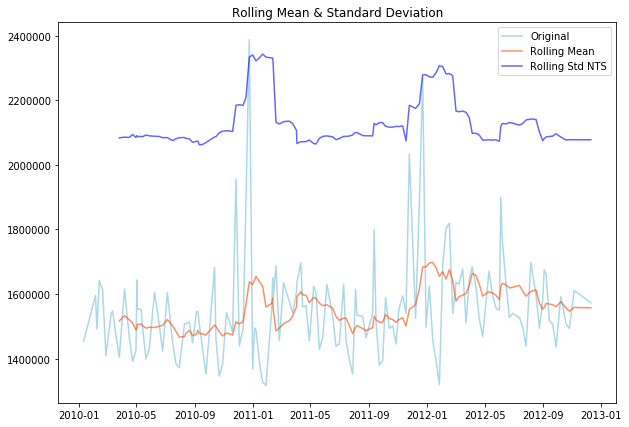

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts):
    
    #Determing rolling statistics
    rolmean = ts.rolling(window=10).mean()
    rolstd = ts.rolling(window=10).std()
    rolstd = rolstd + 2000000
    plt.figure(figsize = (10,7))
    plt.plot(ts, color='lightblue',label='Original')
    plt.plot(rolmean, color='orangered', label='Rolling Mean', alpha = .6)
    plt.plot(rolstd, color='blue', label = 'Rolling Std NTS', alpha = .6)
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
test_stationarity(ts)